<a href="https://colab.research.google.com/github/ArquimedesG/Machine_Learning_Colabs/blob/main/ML_S9_Pipelines_01AU23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#  Importing Numpy and Pandas
import numpy as np
import pandas as pd

# Importing Pipeline and make_pipeline from sklearn.pipeline
from sklearn.pipeline import Pipeline, make_pipeline

# Importing accuracy score from sklearn.metrics
from sklearn.metrics import accuracy_score

# Importing StandardScaler from sklearn.preprocessing
from sklearn.preprocessing import StandardScaler

# Importing SVC from sklearn.SVC
from sklearn.svm import SVC

# Importing train_test_split from sklearn.model_selection
from sklearn.model_selection import train_test_split

### Pipelines scikit-learn

A pipeline defines a chain of transformations that are applied to your data set sequentially, where the last step in the chain is your machine learning model (e.g., your classifier or regressor).

Pipelines are a way to streamline a lot of the routine processes, encapsulating little pieces of logic into one function call, which makes it easier to actually do modeling instead just writing a bunch of code.

Pipelines allow for experiments, and for a dataset like this that only has the text as a feature, you're going to need to do a lot of experiments.

Plus, when your modeling gets really complicated, it's sometimes hard to see if you have any data leakage hiding somewhere.

Pipelines are set up with the fit/transform/predict functionality, so you can fit a whole pipeline to the training data and transform to the test data, without having to do it individually for each thing you do.


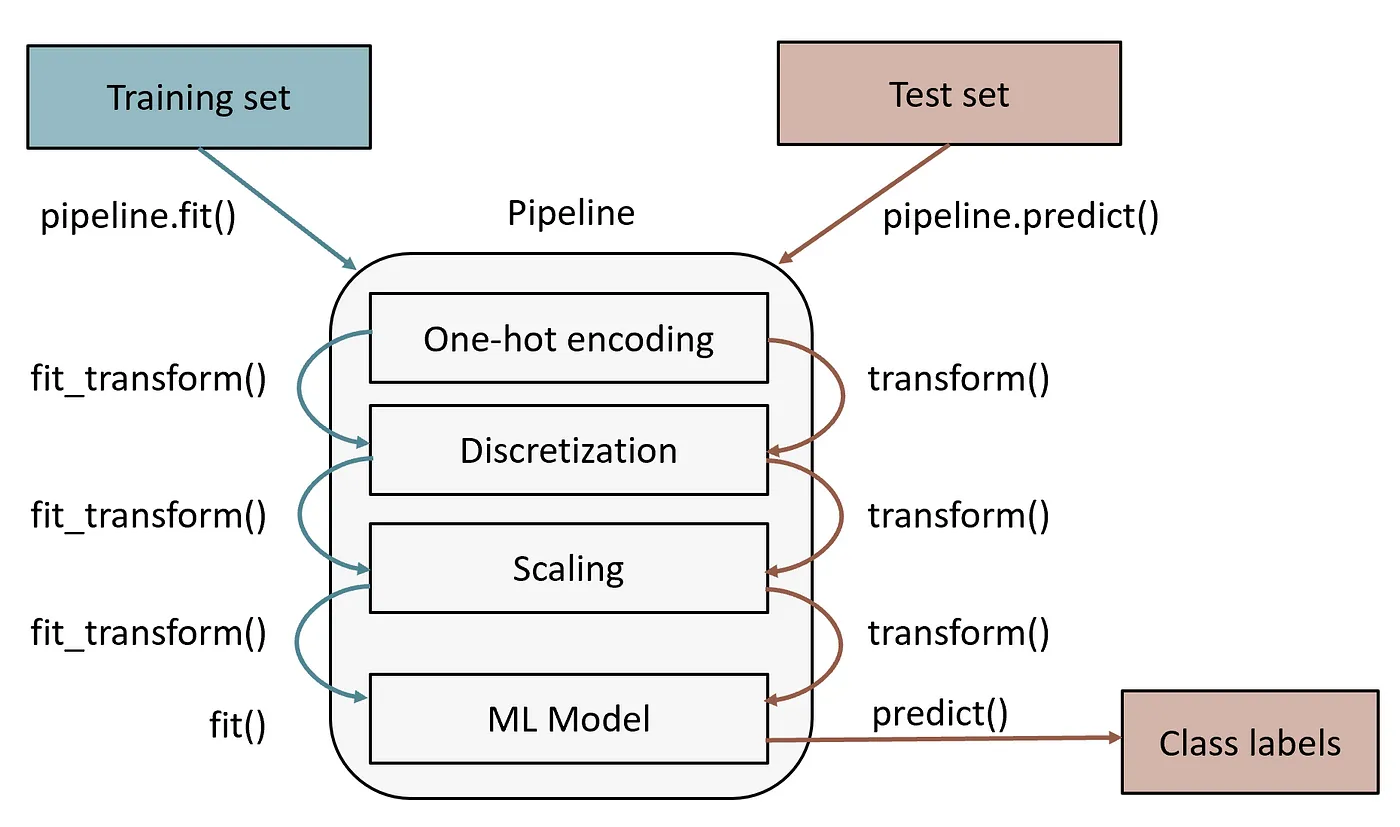

There are many advantages of using a pipeline to define your models:

    It allows you to keep all the definitions and components of your model in one place, which makes it easier to reuse the model or change it in the future.

    You can use grid search and cross-validate all the steps of the model together.

    The pipeline automatically performs the relevant operations when it is applied to the training and the test sets.
    For example, in the training phase, it calls the fit_transform() method of all the transformers, while in the prediction/test phase it calls their transform() method.

### Pipelines scikit-learn

Pipeline of transforms with a final estimator.

Sequentially apply a list of transforms and a final estimator. Intermediate steps of the pipeline must be ‘transforms’, that is, they must implement fit and transform methods.

The final estimator only needs to implement fit. The transformers in the pipeline can be cached using memory argument.

The purpose of the pipeline is to assemble several steps that can be cross-validated together while setting different parameters.

For this, it enables setting parameters of the various steps using their names and the parameter name separated by a '__', as in the example below.

A step’s estimator may be replaced entirely by setting the parameter with its name to another estimator, or a transformer removed by setting it to 'passthrough' or None.


**class sklearn.pipeline.Pipeline(steps, *, memory=None, verbose=False) **


**Parameters:**

    stepslist of tuple
    List of (name, transform) tuples (implementing fit/transform) that are chained in sequential order.
    The last transform must be an estimator.

    memorystr or object with the joblib.Memory interface, default=None
    Used to cache the fitted transformers of the pipeline. The last step will never be cached, even if it is a transformer.
    By default, no caching is performed. If a string is given, it is the path to the caching directory.
    Enabling caching triggers a clone of the transformers before fitting.
    Therefore, the transformer instance given to the pipeline cannot be inspected directly.
    Use the attribute named_steps or steps to inspect estimators within the pipeline.
    Caching the transformers is advantageous when fitting is time consuming.

    verbosebool, default=False
    If True, the time elapsed while fitting each step will be printed as it is completed.

**Attributes:**

    named_stepsBunch
    Access the steps by name.

    classes_ndarray of shape (n_classes,)
    The classes labels.

    n_features_in_int
    Number of features seen during first step fit method.

    feature_names_in_ndarray of shape (n_features_in_,)
    Names of features seen during first step fit method.

**Methods**



    decision_function(X)
    Transform the data, and apply decision_function with the final estimator.

    fit(X[, y])
    Fit the model.

    fit_predict(X[, y])
    Transform the data, and apply fit_predict with the final estimator.

    fit_transform(X[, y])
    Fit the model and transform with the final estimator.
    
    get_feature_names_out([input_features])
    Get output feature names for transformation.

    get_metadata_routing()
    Get metadata routing of this object.

    get_params([deep])
    Get parameters for this estimator.  

    inverse_transform(Xt)
    Apply inverse_transform for each step in a reverse order.

    predict(X, **predict_params)
    Transform the data, and apply predict with the final estimator.

    predict_log_proba(X, **predict_log_proba_params)
    Transform the data, and apply predict_log_proba with the final estimator.

    predict_proba(X, **predict_proba_params)
    Transform the data, and apply predict_proba with the final estimator.

    score(X[, y, sample_weight])
    Transform the data, and apply score with the final estimator.

    score_samples(X)
    Transform the data, and apply score_samples with the final estimator.

    set_output(*[, transform])
    Set the output container when "transform" and "fit_transform" are called.

    set_params(**kwargs)
    Set the parameters of this estimator.

    set_score_request(*[, sample_weight])
    Request metadata passed to the score method.

    transform(X)
    Transform the data, and apply transform with the final estimator.


## UCI ML Wine Data Set

Using chemical analysis determine the origin of wines

These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.

The attributes are:

    1) Alcohol
    2) Malic acid
    3) Ash
    4) Alcalinity of ash  
    5) Magnesium
    6) Total phenols
    7) Flavanoids
    8) Nonflavanoid phenols
    9) Proanthocyanins
    10)Color intensity
    11)Hue
    12)OD280/OD315 of diluted wines
    13)Proline


####  sklearn.utils.Bunch

class sklearn.utils.Bunch(**kwargs)[source]

Container object exposing keys as attributes.

Bunch objects are sometimes used as an output for functions and methods. They extend dictionaries by enabling values to be accessed by key, bunch["value_key"], or by an attribute, bunch.value_key.

In [ ]:
# Importing the load_wine dataset from sklearn.datasets
from sklearn.datasets import load_wine

# Assigning the dataset details (bunch object) to a variable data
data=load_wine()

data

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

### sklearn.datasets.load_wine

***sklearn.datasets.load_wine(*, return_X_y=False, as_frame=False)***

Load and return the wine dataset (classification).

The wine dataset is a classic and very easy multi-class classification dataset.

    Classes           3
    Samples per class [59,71,48]
    Samples total     178
    Dimensionality    13
    Features          real, positive

**Parameters:**

**return_X_ybool**, default=False

If True, returns (data, target) instead of a Bunch object. See below for more information about the data and target object.

**as_framebool**, default=False

If True, the data is a pandas DataFrame including columns with appropriate dtypes (numeric). The target is a pandas DataFrame or Series depending on the number of target columns. If return_X_y is True, then (data, target) will be pandas DataFrames or Series as described below.


**Returns:**

**dataBunch**

Dictionary-like object, with the following attributes.

    data{ndarray, dataframe} of shape (178, 13)
    The data matrix. If as_frame=True, data will be a pandas DataFrame.

    target: {ndarray, Series} of shape (178,)
    The classification target. If as_frame=True, target will be a pandas Series.

    feature_names: list
    The names of the dataset columns.

    target_names: list
    The names of target classes.

    frame: DataFrame of shape (178, 14)
    Only present when as_frame=True. DataFrame with data and target.

    DESCR: str
    The full description of the dataset.

    (data, target)tuple if return_X_y is True
    A tuple of two ndarrays by default. The first contains a 2D array of shape (178, 13) with each row representing one sample and each column representing the features.
    The second array of shape (178,) contains the target samples.

In [ ]:
# Extracting from bunch object the data matrix and the names of the dataset columns and converting them to a dataframe
df=pd.DataFrame(data=data.data, columns=data.feature_names)
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [ ]:
# Assigning df dataframe to X (inputs)
X=df
# Extracting from bunch object the data matrix and the classification target (output)
Y=data.target

Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [ ]:


# Splitting the X and Y dataframes in test and train datasets
x_train, x_test, y_train, y_test = train_test_split(X,Y)

#Showing input training dataset
x_train

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
61,12.64,1.36,2.02,16.8,100.0,2.02,1.41,0.53,0.62,5.75,0.98,1.59,450.0
124,11.87,4.31,2.39,21.0,82.0,2.86,3.03,0.21,2.91,2.80,0.75,3.64,380.0
77,11.84,2.89,2.23,18.0,112.0,1.72,1.32,0.43,0.95,2.65,0.96,2.52,500.0
131,12.88,2.99,2.40,20.0,104.0,1.30,1.22,0.24,0.83,5.40,0.74,1.42,530.0
16,14.30,1.92,2.72,20.0,120.0,2.80,3.14,0.33,1.97,6.20,1.07,2.65,1280.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,13.36,2.56,2.35,20.0,89.0,1.40,0.50,0.37,0.64,5.60,0.70,2.47,780.0
17,13.83,1.57,2.62,20.0,115.0,2.95,3.40,0.40,1.72,6.60,1.13,2.57,1130.0
165,13.73,4.36,2.26,22.5,88.0,1.28,0.47,0.52,1.15,6.62,0.78,1.75,520.0
28,13.87,1.90,2.80,19.4,107.0,2.95,2.97,0.37,1.76,4.50,1.25,3.40,915.0


In [ ]:
# Showing output training dataset
y_train

array([1, 1, 1, 2, 0, 1, 1, 2, 1, 2, 1, 1, 0, 0, 0, 1, 2, 2, 1, 2, 2, 0,
       1, 0, 1, 0, 1, 0, 0, 2, 1, 2, 1, 2, 1, 0, 1, 2, 2, 1, 1, 2, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 2, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 2, 2, 0, 1, 1, 0, 1, 2, 1, 1, 1, 0, 2, 2, 0, 0, 0, 0, 0, 1, 2,
       0, 0, 0, 2, 1, 2, 1, 1, 0, 1, 2, 0, 0, 1, 0, 0, 2, 0, 0, 2, 1, 2,
       0, 1, 0, 1, 0, 2, 1, 1, 0, 1, 0, 1, 1, 0, 1, 2, 2, 1, 2, 0, 2, 0,
       1])

### Support Vector Machine (SVM)

An SVM classifier, or support vector machine classifier, is a type of machine learning algorithm that can be used to analyze and classify data.

 A support vector machine is a supervised machine learning algorithm that can be used for both classification and regression tasks.

 The Support vector machine classifier works by finding the hyperplane that maximizes the margin between the two classes.

 The Support vector machine algorithm is also known as a max-margin classifier.

  Support vector machine is a powerful tool for machine learning and has been widely used in many tasks such as hand-written digit recognition, facial expression recognition, and text classification.
  
  Support vector machine has many advantages over other machine learning algorithms, such as robustness to noise and the ability to handle large datasets.

  The objective of the support vector machine algorithm is to find a hyperplane in an N-dimensional space(N — the number of features) that distinctly classifies the data points.

  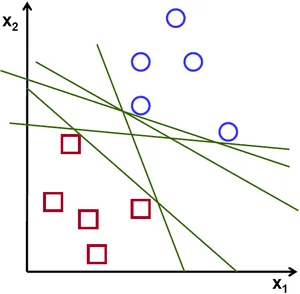

  To separate the two classes of data points, there are many possible hyperplanes that could be chosen. Our objective is to find a plane that has the maximum margin, i.e the maximum distance between data points of both classes. Maximizing the margin distance provides some reinforcement so that future data points can be classified with more confidence.

  Hyperplanes are decision boundaries that help classify the data points. Data points falling on either side of the hyperplane can be attributed to different classes. Also, the dimension of the hyperplane depends upon the number of features. If the number of input features is 2, then the hyperplane is just a line. If the number of input features is 3, then the hyperplane becomes a two-dimensional plane.

  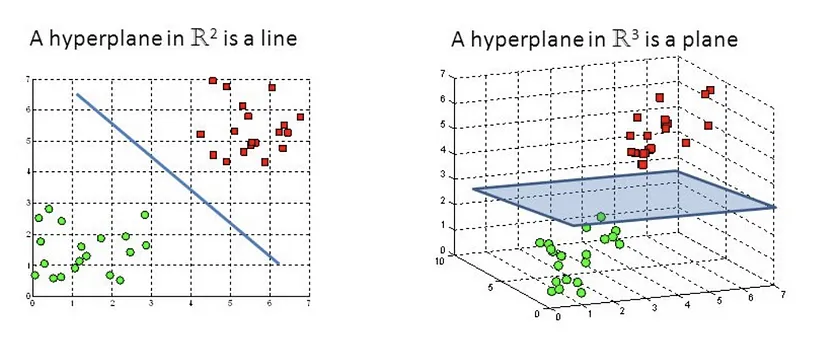

  Support vectors are data points that are closer to the hyperplane and influence the position and orientation of the hyperplane. Using these support vectors, we maximize the margin of the classifier. Deleting the support vectors will change the position of the hyperplane. These are the points that help us build our SVM.

  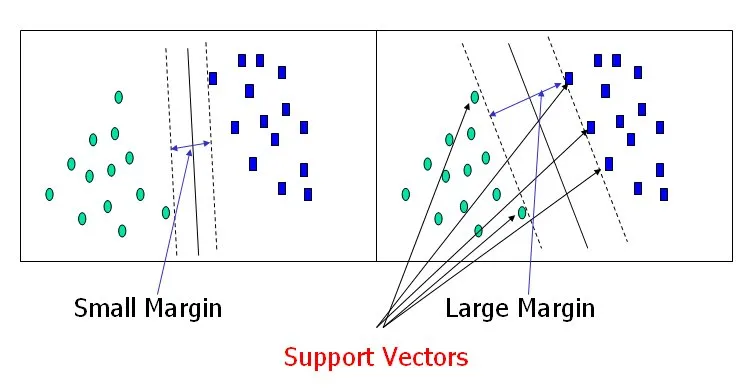

### SVC

SVC, or Support Vector Classifier, is a supervised machine learning algorithm typically used for classification tasks.

SVC works by mapping data points to a high-dimensional space and then finding the optimal hyperplane that divides the data into two classes.



In [ ]:
#  Creating a pipeline named pipe that will scale the data provided using Standard Scaler and later it will perform SVC (Support Vector Classifier) on the scaled data
pipe=Pipeline([
('scaler', StandardScaler()),
('svc', SVC())
])

In [ ]:
#  Showing the pipeline structure
pipe

Pipeline(steps=[('scaler', StandardScaler()), ('svc', SVC())])

In [ ]:
#  Fitting the model using the x_train and y_train datasets
pipe.fit(x_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('svc', SVC())])

In [ ]:
# Applying the pipeline to predict output values based on the x_test dataset
y_predict=pipe.predict(x_test)
#  Showing the predicted values
y_predict

array([0, 2, 1, 1, 1, 2, 1, 1, 0, 2, 1, 1, 1, 0, 2, 1, 0, 2, 0, 2, 1, 1,
       2, 2, 1, 2, 0, 2, 2, 2, 0, 2, 0, 0, 1, 2, 0, 2, 0, 1, 1, 1, 2, 1,
       0])

In [ ]:
#  Calculating the accuracy_score between true outputs (y_test) and predicted outputs (y_predict)
accuracy_score(y_predict, y_test)

0.9777777777777777

## SMS Spam Collection Dataset

The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research.

It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam.

The files contain one message per line. Each line is composed by two columns: v1 contains the label (ham or spam) and v2 contains the raw text.

This corpus has been collected from free or free for research sources at the Internet:

-> A collection of 425 SMS spam messages was manually extracted from the Grumbletext Web site. This is a UK forum in which cell phone users make public claims about SMS spam messages, most of them without reporting the very spam message received. The identification of the text of spam messages in the claims is a very hard and time-consuming task, and it involved carefully scanning hundreds of web pages.

-> A subset of 3,375 SMS randomly chosen ham messages of the NUS SMS Corpus (NSC), which is a dataset of about 10,000 legitimate messages collected for research at the Department of Computer Science at the National University of Singapore. The messages largely originate from Singaporeans and mostly from students attending the University. These messages were collected from volunteers who were made aware that their contributions were going to be made publicly available.

-> A list of 450 SMS ham messages collected from Caroline Tag's PhD Thesis

-> Finally, we have incorporated the SMS Spam Corpus v.0.1 Big. It has 1,002 SMS ham messages and 322 spam messages

In [ ]:
# Reading csv file with messages database (v2) and its classification (v1) as ham or spam in a dataframe, dropping unused columns and enaming first two columns
df = pd.read_csv('spam.csv', encoding='latin-1').drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']).rename(columns={"v1": "Category", "v2": "Message"})
#df = pd.read_csv('https://gist.githubusercontent.com/javierIA/dee51cb04824e519cb113b49897b84bb/raw/f78307e58718bebaafe566ad725b17a6298c803a/spam.csv')

#  Displaying dataframe
df


,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
#  Displaying dataframe general information
df.info

<bound method DataFrame.info of      Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham              Will Ì_ b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]>

In [ ]:
#  Assigning the colum "Message" of the dataframe to a series X and the colum "Category" of the dataframe to a series Y
X=df["Message"]
Y=df["Category"]

#  Splitting the X and Y series into the train and test
x_train, x_test, y_train, y_test = train_test_split(X,Y)

In [ ]:
# Showing content of train input dataset
x_train

5000    Nope. Since ayo travelled, he has forgotten hi...
3608    Joy's father is John. Then John is the ____ of...
551     Hurry up, I've been weed-deficient for like th...
5284                             Sent me ur email id soon
1466    Your account has been refilled successfully by...
                              ...                        
3402         Good night my dear.. Sleepwell&amp;Take care
2311    Congratulations! Thanks to a good friend U hav...
2706    S now only i took tablets . Reaction morning o...
480                          Almost there, see u in a sec
809       Ugh I don't wanna get out of bed. It's so warm.
Name: Message, Length: 4179, dtype: object

In [ ]:
# Showing content of train output dataset
y_train

5000     ham
3608     ham
551      ham
5284     ham
1466     ham
        ... 
3402     ham
2311    spam
2706     ham
480      ham
809      ham
Name: Category, Length: 4179, dtype: object

### FunctionTransformer

In addition to simply wrapping a given user-defined function, the FunctionTransformer provides some standard methods of other sklearn estimators (e.g., fit and transform).

The benefit of this is that you can introduce arbitrary, stateless transforms into an sklearn Pipeline, which combines multiple processing stages.

This makes executing a processing pipeline easier because you can simply pass your data (X) to the fit and transform methods of the Pipeline object without having to explicitly apply each stage of the pipeline individually.

### sklearn.preprocessing.FunctionTransformer

Constructs a transformer from an arbitrary callable.

A FunctionTransformer forwards its X (and optionally y) arguments to a user-defined function or function object and returns the result of this function. This is useful for stateless transformations such as taking the log of frequencies, doing custom scaling, etc.

Note: If a lambda is used as the function, then the resulting transformer will not be pickleable.

**class sklearn.preprocessing.FunctionTransformer(func=None, inverse_func=None, *, validate=False, accept_sparse=False, check_inverse=True, feature_names_out=None, kw_args=None, inv_kw_args=None)**


**Parameters:**

    funccallable, default=None
    The callable to use for the transformation. This will be passed the same arguments as transform, with args and kwargs forwarded. If func is None, then func will be the identity function.

    inverse_funccallable, default=None
    The callable to use for the inverse transformation.
    This will be passed the same arguments as inverse transform, with args and kwargs forwarded.
    If inverse_func is None, then inverse_func will be the identity function.

    validatebool, default=False
    Indicate that the input X array should be checked before calling func. The possibilities are:
      If False, there is no input validation.
      If True, then X will be converted to a 2-dimensional NumPy array or sparse matrix.
      If the conversion is not possible an exception is raised.

    accept_sparsebool, default=False
    Indicate that func accepts a sparse matrix as input.
    If validate is False, this has no effect.
    Otherwise, if accept_sparse is false, sparse matrix inputs will cause an exception to be raised.

    check_inversebool, default=True
    Whether to check that or func followed by inverse_func leads to the original inputs.
    It can be used for a sanity check, raising a warning when the condition is not fulfilled.


    feature_names_outcallable, ‘one-to-one’ or None, default=None
    Determines the list of feature names that will be returned by the get_feature_names_out method.
    If it is ‘one-to-one’, then the output feature names will be equal to the input feature names.
    If it is a callable, then it must take two positional arguments: this FunctionTransformer (self) and an array-like of input feature names (input_features).
    It must return an array-like of output feature names. The get_feature_names_out method is only defined if feature_names_out is not None.

    kw_argsdict, default=None
    Dictionary of additional keyword arguments to pass to func.

    inv_kw_argsdict, default=None
    Dictionary of additional keyword arguments to pass to inverse_func.

**Attributes:**

    n_features_in_int
    Number of features seen during fit.

    feature_names_in_ndarray of shape (n_features_in_,)
    Names of features seen during fit. Defined only when X has feature names that are all strings.

**Methods**

    fit(X[, y])
    Fit transformer by checking X.

    fit_transform(X[, y])
    Fit to data, then transform it.

    get_feature_names_out([input_features])
    Get output feature names for transformation.

    get_metadata_routing()
    Get metadata routing of this object.

    get_params([deep])
    Get parameters for this estimator.

    inverse_transform(X)
    Transform X using the inverse function.

    set_output(*[, transform])
    Set output container.

    set_params(**params)
    Set the parameters of this estimator.

    transform(X)
    Transform X using the forward function.

## FeatureUnion

 Concatenates results of multiple transformer objects. This estimator applies a list of transformer objects in parallel to the input data, then concatenates the results. This is useful to combine several feature extraction mechanisms into a single transformer.

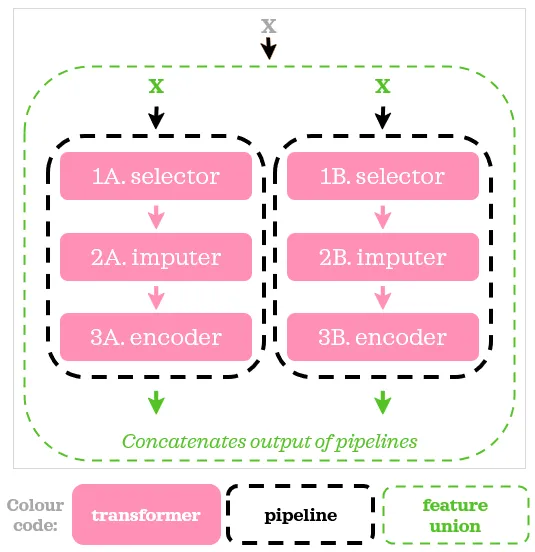

FeatureUnion combines several transformer objects into a new transformer that combines their output.

A FeatureUnion takes a list of transformer objects.

During fitting, each of these is fit to the data independently.

For transforming data, the transformers are applied in parallel, and the sample vectors they output are concatenated end-to-end into larger vectors.

FeatureUnion serves the same purposes as Pipeline - convenience and joint parameter estimation and validation.

FeatureUnion and Pipeline can be combined to create complex models.

A FeatureUnion is built using a list of (key, value) pairs, where the key is the name you want to give to a given transformation (an arbitrary string; it only serves as an identifier) and value is an estimator object

**class sklearn.pipeline.FeatureUnion(transformer_list, *, n_jobs=None, transformer_weights=None, verbose=False)**

**Parameters:**

    transformer_listlist of (str, transformer) tuples
    List of transformer objects to be applied to the data. The first half of each tuple is the name of the transformer.
    The transformer can be ‘drop’ for it to be ignored or can be ‘passthrough’ for features to be passed unchanged.

    n_jobsint, default=None
    Number of jobs to run in parallel. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors.

    transformer_weightsdict, default=None
    Multiplicative weights for features per transformer. Keys are transformer names, values the weights.
    Raises ValueError if key not present in transformer_list.

    verbosebool, default=False
    If True, the time elapsed while fitting each transformer will be printed as it is completed.

**Attributes:**

    named_transformersBunch
    Dictionary-like object, with the following attributes. Read-only attribute to access any transformer parameter by user given name. Keys are transformer names and values are transformer parameters.


    n_features_in_int
    Number of features seen during fit.

    feature_names_in_ndarray of shape (n_features_in_,)
    Names of features seen during fit.

**Methods**

    fit(X[, y])
    Fit all transformers using X.

    fit_transform(X[, y])
    Fit all transformers, transform the data and concatenate results.

    get_feature_names_out([input_features])
    Get output feature names for transformation.

    get_metadata_routing()
    Get metadata routing of this object.

    get_params([deep])
    Get parameters for this estimator.

    set_output(*[, transform])
    Set the output container when "transform" and "fit_transform" are called.

    set_params(**kwargs)
    Set the parameters of this estimator.

    transform(X)
    Transform X separately by each transformer, concatenate results.



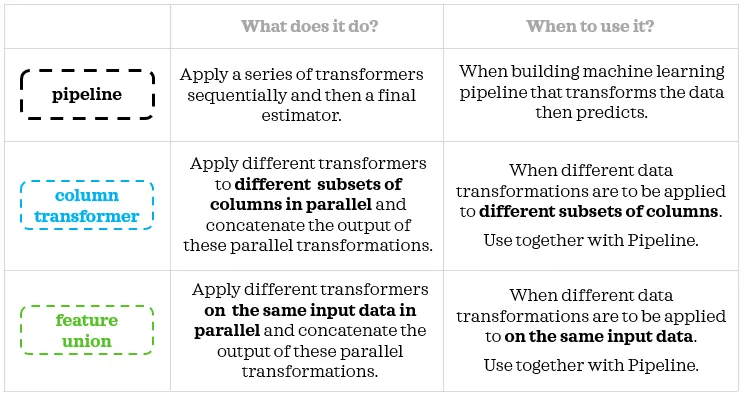



### Term Frequency-Inverse Document Frequency (TF-IDF)

TF-IDF stands for Term Frequency Inverse Document Frequency of records.

It can be defined as the calculation of how relevant a word in a series or corpus is to a text.

The meaning increases proportionally to the number of times in the text a word appears but is compensated by the word frequency in the corpus (data-set).

**Terminologies:**

    Term Frequency:
    In document d, the frequency represents the number of instances of a given word t.
    Therefore, we can see that it becomes more relevant when a word appears in the text, which is rational.
    Since the ordering of terms is not significant, we can use a vector to describe the text in the bag of term models.
    For each specific term in the paper, there is an entry with the value being the term frequency.
    
    tf(t,d) = count of t in d / number of words in d

    Document Frequency:
    This tests the meaning of the text, which is very similar to TF, in the whole corpus collection.
    The only difference is that in document d, TF is the frequency counter for a term t, while df is the number of occurrences
    in the document set N of the term t.
    In other words, the number of papers in which the word is present is DF.
    The weight of a term that occurs in a document is simply proportional to the term frequency

    df(t) = occurrence of t in documents

    Inverse Document Frequency:
    Mainly, it tests how relevant the word is.
    The key aim of the search is to locate the appropriate records that fit the demand.
    Since tf considers all terms equally significant, it is therefore not only possible to use the term frequencies to measure
    the weight of the term in the paper.
    First, find the document frequency of a term t by counting the number of documents containing the term:

    df(t) = N(t)
    where
    df(t) = Document frequency of a term t
    N(t) = Number of documents containing the term t

    Term frequency is the number of instances of a term in a single document only; although the frequency of the document
    is the number of separate documents in which the term appears, it depends on the entire corpus.
    Now let’s look at the definition of the frequency of the inverse paper.
    The IDF of the word is the number of documents in the corpus separated by the frequency of the text.

    idf(t) = N/ df(t) = N/N(t)

    The more common word is supposed to be considered less significant, but the element (most definite integers) seems too harsh.
    We then take the logarithm (with base 2) of the inverse frequency of the paper. So the if of the term t becomes:

    idf(t) = log(N/ df(t))

Computation:

    Tf-idf is one of the best metrics to determine how significant a term is to a text in a series or a corpus.
    tf-idf is a weighting system that assigns a weight to each word in a document based on its term frequency (tf)
    and the reciprocal document frequency (tf) (idf).
    The words with higher scores of weight are deemed to be more significant.

Usually, the tf-idf weight consists of two terms:

    Normalized Term Frequency (tf)
    Inverse Document Frequency (idf)

    tf-idf(t, d) = tf(t, d) * idf(t)

**Using TF-IDF in machine learning & natural language processing**

Machine learning algorithms often use numerical data, so when dealing with textual data or any natural language processing (NLP) task, a sub-field of ML/AI dealing with text, that data first needs to be converted to a vector of numerical data by a process known as vectorization.

TF-IDF vectorization involves calculating the TF-IDF score for every word in your corpus relative to that document and then putting that information into a vector (see image below using example documents “A” and “B”).

Thus each document in your corpus would have its own vector, and the vector would have a TF-IDF score for every single word in the entire collection of documents.

Once you have these vectors you can apply them to various use cases such as seeing if two documents are similar by comparing their TF-IDF vector using cosine similarity.

Let’s take an example to get a clearer understanding.

Sentence 1 : The car is driven on the road.

Sentence 2: The truck is driven on the highway.

In this example, each sentence is a separate document.

We will now calculate the TF-IDF for the above two documents, which represent our corpus.

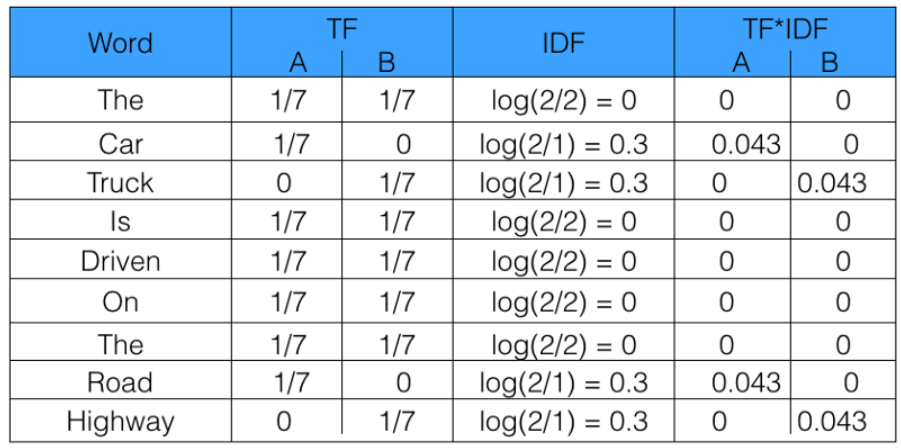

From the above table, we can see that TF-IDF of common words was zero, which shows they are not significant. On the other hand, the TF-IDF of “car” , “truck”, “road”, and “highway” are non-zero. These words have more significance.



### sklearn.feature_extraction.text.TfidfVectorizer

Converts a collection of raw documents to a matrix of TF-IDF features.

Equivalent to CountVectorizer followed by TfidfTransformer.

**sklearn.feature_extraction.text.TfidfVectorizer(input)**

**Parameters:**

    input:
    It refers to parameter document passed, it can be a filename, file or content itself.

**Attributes:**

    vocabulary_:
    It returns a dictionary of terms as keys and values as feature indices.

    idf_: It returns the inverse document frequency vector of the document passed as a parameter.

  
**Returns:**

    fit_transform():
    It returns an array of terms along with tf-idf values.

    get_feature_names():
    It returns a list of feature names.

In [ ]:
# Importing FunctionTransformer from sklearn.preprocessing
from sklearn.preprocessing import FunctionTransformer

# Importing FeatureUnion from sklearn.pipeline
from sklearn.pipeline import FeatureUnion

# Importing TfidfVectorizer from sklearn.feature_extraction.text
from sklearn.feature_extraction.text import TfidfVectorizer


In [ ]:
# Defining a function that provides the number of times that a word repeats in a text
def get_text_length(x):
  return np.array([len(t) for t in x]).reshape(-1,1)

In [ ]:
#  Create a FeatureUnion that performs TF-IDF and the function length
#  Tf-idf will produce a numpy array of the words used in the texts (only one element per word)
#  Also Tf-idf produces a CSR (Compressed Sparse Row) sparse matrix. This is a type of simplified way to express a matrix with many unused elements (zeroes)
#  The matrix will indicate the coordinates row (sentence) and column (word) and the value (rating) of the element
preprocessor=FeatureUnion([
  ('tf-idf', TfidfVectorizer()),
  ('length', FunctionTransformer(get_text_length, validate=False))
  ])
preprocessor

FeatureUnion(transformer_list=[('tf-idf', TfidfVectorizer()),
                               ('length',
                                FunctionTransformer(func=<function get_text_length at 0x7b0eaa98d000>))])

In [ ]:
pipe= make_pipeline(preprocessor, SVC() )
pipe

Pipeline(steps=[('featureunion',
                 FeatureUnion(transformer_list=[('tf-idf', TfidfVectorizer()),
                                                ('length',
                                                 FunctionTransformer(func=<function get_text_length at 0x7b0eaa98d000>))])),
                ('svc', SVC())])

In [ ]:
pipe.fit(x_train, y_train)

Pipeline(steps=[('featureunion',
                 FeatureUnion(transformer_list=[('tf-idf', TfidfVectorizer()),
                                                ('length',
                                                 FunctionTransformer(func=<function get_text_length at 0x7b0eaa98d000>))])),
                ('svc', SVC())])

In [ ]:
y_predict=pipe.predict(x_test)
accuracy_score(y_test, y_predict)

0.8729361091170137

## Example using tf-idf and length function in separate steps

In [ ]:
# List of sentences
input1=['El perro corre rapido y el conejo salta y el gallo canta', 'El gato', 'la paloma', 'los pericos hablan mucho', 'La arana', 'El perro']

In [ ]:
# Applying Function Transformer to the get_text_length function
func=FunctionTransformer(get_text_length, validate=False)
func


FunctionTransformer(func=<function get_text_length at 0x7b0eaa98d000>)

In [ ]:
# The output is an array with the number of characters for each sentence
out=func.transform(input1)
out

array([[56],
       [ 7],
       [ 9],
       [24],
       [ 8],
       [ 8]])

In [ ]:
#  Defining a TfidfVectorizer object
tfid2=TfidfVectorizer()
tfid2

TfidfVectorizer()

In [ ]:
#  Applying the Tfidf to the list of sentences
out2=tfid2.fit_transform(input1)
out2

<6x16 sparse matrix of type '<class 'numpy.float64'>'
	with 20 stored elements in Compressed Sparse Row format>

In [ ]:
# The output of the tfidf fit_transform is a sparse matrix showing the (sentence, word) elemet that has a calculated value different than zero
print(out2)

  (0, 1)	0.30170213724846917
  (0, 5)	0.30170213724846917
  (0, 15)	0.30170213724846917
  (0, 2)	0.30170213724846917
  (0, 14)	0.30170213724846917
  (0, 3)	0.30170213724846917
  (0, 13)	0.24740006845264753
  (0, 4)	0.6266164124948058
  (1, 6)	0.8221903715494888
  (1, 4)	0.5692126078464125
  (2, 11)	0.7732623667832087
  (2, 8)	0.6340862024337309
  (3, 10)	0.5
  (3, 7)	0.5
  (3, 12)	0.5
  (3, 9)	0.5
  (4, 0)	0.7732623667832087
  (4, 8)	0.6340862024337309
  (5, 13)	0.764096101185661
  (5, 4)	0.6451024322949592


In [ ]:
#  The output of the method get_feature_names_out is a list of the unique words in the sentences
print(tfid2.get_feature_names_out())

['arana' 'canta' 'conejo' 'corre' 'el' 'gallo' 'gato' 'hablan' 'la' 'los'
 'mucho' 'paloma' 'pericos' 'perro' 'rapido' 'salta']
